# Exploratory Data Analysis (EDA) on California House Price Dataset

### About

The California House Price dataset contains information about housing prices and various
factors influencing them. The dataset consists of:
● Median House Value (Target Variable)
● Longitude & Latitude (Location)
● Housing Median Age
● Total Rooms & Total Bedrooms
● Population & Households
● Median Income
● Ocean Proximity (Categorical Feature)

### Objectives

* Identify features that have a strong impact on house prices 


## Importing libraries

In [41]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [42]:
# Setting theme for charts

plt.style.use('ggplot')

## 1. Data Wrangling

Loading the data -

In [43]:
data=pd.read_csv('housing.csv')
# Displaying the first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.1 Inspecting data

In [44]:
# Checking shape of the data
data.shape

(20640, 10)

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


##  Data Cleaning & Preprocessing

In [47]:
# Checking for duplicate rows
data.duplicated().sum()


np.int64(0)

no duplicate values present

 Check for missing values


In [48]:
missing_values=data.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 missing values in total bedrooms column

In [49]:
# Percentage of missing values in the 'total_bedrooms' column
missing_percentage = (data['total_bedrooms'].isnull().sum() / len(data)) * 100
print(f"Percentage of missing values in 'total_bedrooms': {missing_percentage:.2f}%")

Percentage of missing values in 'total_bedrooms': 1.00%


In [50]:
# handling missing values by mean imputation
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_14036\4008346644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)


In [55]:
import warnings 
warnings.filterwarnings('ignore')

checking how many numeric columns are present and how many non-numeric columns

In [51]:
numerical_cols = data.select_dtypes(include='number')
print("Number of numerical columns:", len(numerical_cols.columns))
print("Numerical columns:", numerical_cols.columns.tolist())

categorical_cols = data.select_dtypes(exclude='number')
print("Number of categorical columns:", len(categorical_cols.columns))
print("Non-numerical columns:", categorical_cols.columns.tolist())


Number of numerical columns: 9
Numerical columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Number of categorical columns: 1
Non-numerical columns: ['ocean_proximity']


In [52]:
# Checking for unique values in 'ocean proximity' column
unique_ocean_proximity = data['ocean_proximity'].unique()
print("Unique values in 'ocean_proximity':", unique_ocean_proximity)
value=data['ocean_proximity'].value_counts()
print("Value counts for 'ocean_proximity':",value)




Unique values in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Value counts for 'ocean_proximity': ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


converting categorical values to numeric

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])
print(le.classes_)
data.drop('ocean_proximity', axis=1, inplace=True)
data.head()






['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


label assigned

  '<1H OCEAN': 0,
  'INLAND': 1,
  'ISLAND': 2,
  'NEAR BAY': 3,
  'NEAR OCEAN': 4




summary statistics

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity_encoded,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


Distribution Analysis

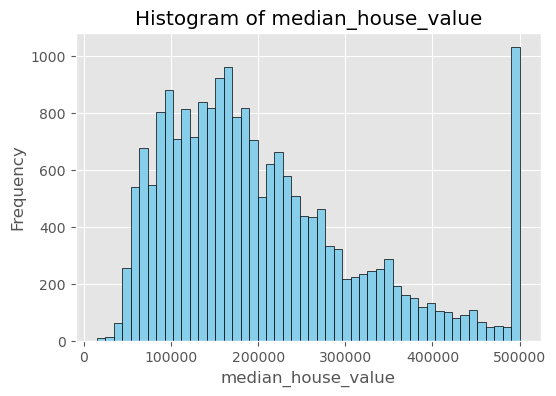

In [58]:
plt.figure(figsize=(6,4))
plt.hist(data['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


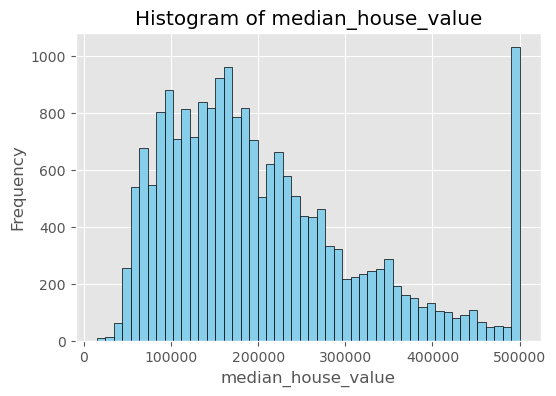

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(data['median_income'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of median_income')
plt.xlabel('median_income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

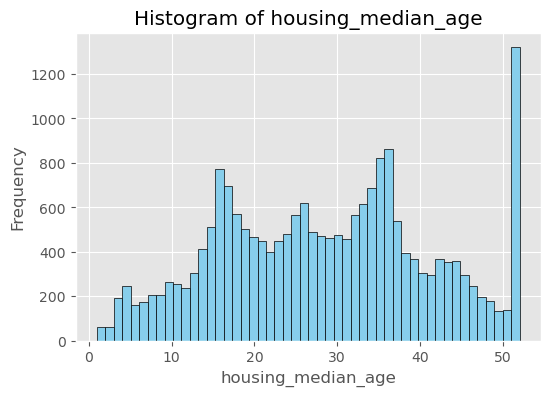

In [57]:
plt.figure(figsize=(6,4))
plt.hist(data['housing_median_age'], bins=50, color='skyblue', edgecolor='black')
plt.title(f'Histogram of housing_median_age')
plt.xlabel('housing_median_age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()